<a href="https://colab.research.google.com/github/manavj01/Batches/blob/main/Copy_of_AQI_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce

In [ ]:
df = pd.read_excel("/content/dataset.xlsx")
# df = pd.read_csv('dataset - dataset.csv')

del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435742 non-null  object        
 1   location  435739 non-null  object        
 2   type      430349 non-null  object        
 3   so2       401096 non-null  float64       
 4   no2       419509 non-null  float64       
 5   rspm      395520 non-null  float64       
 6   spm       198355 non-null  float64       
 7   pm2_5     9314 non-null    float64       
 8   date      435735 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 29.9+ MB


In [ ]:
#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

df.isnull().sum()

state            0
location         0
type             0
so2              0
no2           1981
rspm         29643
spm         228178
pm2_5       386966
date             4
dtype: int64

In [ ]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [ ]:
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df['type'].value_counts()

Residential    244017
Industrial     137420
Other           14724
Name: type, dtype: int64

### Delhi Dataset

In [ ]:
# Delhi -> Filter out Delhi State and create new DF

Delhi_df = df[df['state'] == 'Delhi']
Delhi_df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
65861,Delhi,Delhi,Residential,8.6,16.2,NaN,323.0,NaN,1987-01-09
65862,Delhi,Delhi,Residential,6.5,9.3,NaN,488.0,NaN,1987-02-09
65863,Delhi,Delhi,Industrial,25.8,10.4,NaN,487.0,NaN,1987-03-09
65864,Delhi,Delhi,Industrial,0.5,2.8,NaN,528.0,NaN,1987-03-09
65865,Delhi,Delhi,Industrial,2.5,12.8,NaN,506.0,NaN,1987-02-09


In [ ]:
Delhi_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7810 entries, 65861 to 74411
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     7810 non-null   object        
 1   location  7810 non-null   object        
 2   type      7810 non-null   object        
 3   so2       7810 non-null   float64       
 4   no2       7809 non-null   float64       
 5   rspm      5985 non-null   float64       
 6   spm       4841 non-null   float64       
 7   pm2_5     361 non-null    float64       
 8   date      7810 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 610.2+ KB


In [ ]:
Delhi_df['type'].value_counts()

Residential    4769
Industrial     3041
Name: type, dtype: int64

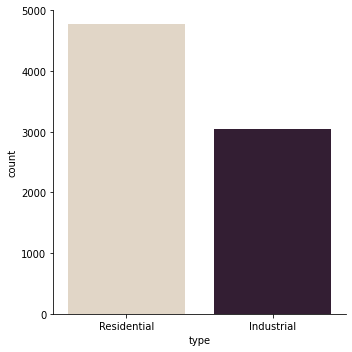

In [ ]:
#how many observations belong to each location
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = Delhi_df)

## Ghaziabad Dataset

In [ ]:
Gzb_df = df[df['state'] == 'Uttar Pradesh']
Gzb_df = df[df['location'] == 'Ghaziabad']
Gzb_df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
369907,Uttar Pradesh,Ghaziabad,Industrial,11.5,9.5,NaN,382.0,NaN,1998-11-01
369923,Uttar Pradesh,Ghaziabad,Industrial,26.9,15.0,NaN,412.0,NaN,1998-12-01
369945,Uttar Pradesh,Ghaziabad,Industrial,29.1,18.8,NaN,337.0,NaN,1999-01-01
369983,Uttar Pradesh,Ghaziabad,Industrial,30.2,18.8,NaN,249.0,NaN,1999-03-01
370000,Uttar Pradesh,Ghaziabad,Industrial,30.8,37.8,NaN,22.0,NaN,1999-04-01


In [ ]:
Gzb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 369907 to 407900
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     1957 non-null   object        
 1   location  1957 non-null   object        
 2   type      1957 non-null   object        
 3   so2       1957 non-null   float64       
 4   no2       1899 non-null   float64       
 5   rspm      1909 non-null   float64       
 6   spm       1004 non-null   float64       
 7   pm2_5     0 non-null      float64       
 8   date      1957 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 152.9+ KB


In [ ]:
Gzb_df['type'].value_counts()

Industrial    1957
Name: type, dtype: int64

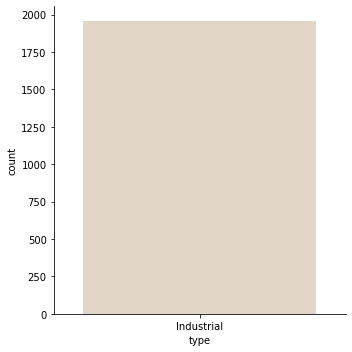

In [ ]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = Gzb_df)

### Noida Dataset

In [ ]:
replacements = {'location': {r'Noida, Ghaziabad': 'Noida', }}
df.replace(replacements, regex = True, inplace = True)

In [ ]:
Noida_df = df[df['state'] == 'Uttar Pradesh']
Noida_df = df[df['location'] == 'Noida']
Noida_df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
371981,Uttar Pradesh,Noida,Industrial,13.9,159.0,55.0,76.0,NaN,2004-02-01
371982,Uttar Pradesh,Noida,Industrial,19.0,114.8,54.0,63.0,NaN,2004-05-01
371983,Uttar Pradesh,Noida,Industrial,27.7,104.8,85.0,72.0,NaN,2004-09-01
371984,Uttar Pradesh,Noida,Industrial,9.7,226.3,102.0,113.0,NaN,2004-12-01
371985,Uttar Pradesh,Noida,Industrial,22.3,188.3,86.0,99.0,NaN,2004-01-16


In [ ]:
Noida_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1465 entries, 371981 to 408721
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     1465 non-null   object        
 1   location  1465 non-null   object        
 2   type      1465 non-null   object        
 3   so2       1465 non-null   float64       
 4   no2       1465 non-null   float64       
 5   rspm      1375 non-null   float64       
 6   spm       1081 non-null   float64       
 7   pm2_5     0 non-null      float64       
 8   date      1465 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 114.5+ KB


In [ ]:
Noida_df['type'].value_counts()

Industrial     758
Residential    707
Name: type, dtype: int64

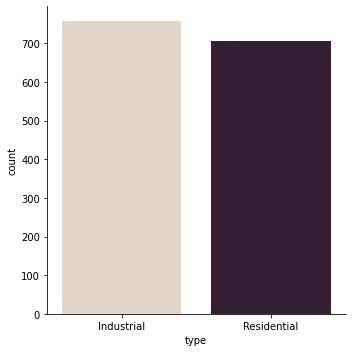

In [ ]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = Noida_df)

### Bulandshahr Dataset

In [ ]:
replacements = {'location': {r'Khurja': 'Bulandshahr', }}
df.replace(replacements, regex = True, inplace = True)

In [ ]:
Bulandshahr_df = df[df['state'] == 'Uttar Pradesh']
Bulandshahr_df = df[df['location'] == 'Bulandshahr']
Bulandshahr_df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
376930,Uttar Pradesh,Bulandshahr,Industrial,45.8,31.0,242.0,572.0,NaN,2006-12-11
376931,Uttar Pradesh,Bulandshahr,Industrial,44.8,34.8,218.0,519.0,NaN,2006-11-16
376932,Uttar Pradesh,Bulandshahr,Industrial,51.5,33.8,207.0,576.0,NaN,2006-11-19
376936,Uttar Pradesh,Bulandshahr,Industrial,105.3,102.5,296.0,582.0,NaN,2006-03-12
376937,Uttar Pradesh,Bulandshahr,Industrial,113.0,106.0,272.0,498.0,NaN,2006-07-12


In [ ]:
Bulandshahr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1234 entries, 376930 to 409440
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     1234 non-null   object        
 1   location  1234 non-null   object        
 2   type      1234 non-null   object        
 3   so2       1234 non-null   float64       
 4   no2       1228 non-null   float64       
 5   rspm      1228 non-null   float64       
 6   spm       448 non-null    float64       
 7   pm2_5     0 non-null      float64       
 8   date      1234 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 96.4+ KB


In [ ]:
Bulandshahr_df['type'].value_counts()

Industrial     644
Residential    590
Name: type, dtype: int64

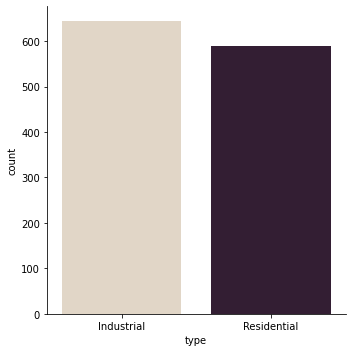

In [ ]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = Bulandshahr_df)

### Meerut Dataset

In [ ]:
Meerut_df = df[df['state'] == 'Uttar Pradesh']
Meerut_df = df[df['location'] == 'Meerut']
Meerut_df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
380919,Uttar Pradesh,Meerut,Residential,11.4,52.2,136.0,776.0,NaN,2007-10-01
380920,Uttar Pradesh,Meerut,Residential,12.1,54.5,122.0,816.0,NaN,2007-12-01
380921,Uttar Pradesh,Meerut,Residential,11.5,57.3,135.0,801.0,NaN,2007-01-20
380922,Uttar Pradesh,Meerut,Residential,11.6,53.2,137.0,774.0,NaN,2007-06-02
380923,Uttar Pradesh,Meerut,Residential,11.2,52.1,136.0,786.0,NaN,2007-12-02


In [ ]:
Meerut_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 380919 to 397601
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   state     676 non-null    object        
 1   location  676 non-null    object        
 2   type      676 non-null    object        
 3   so2       676 non-null    float64       
 4   no2       676 non-null    float64       
 5   rspm      651 non-null    float64       
 6   spm       407 non-null    float64       
 7   pm2_5     0 non-null      float64       
 8   date      676 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 52.8+ KB


In [ ]:
Meerut_df['type'].value_counts()

Residential    676
Name: type, dtype: int64

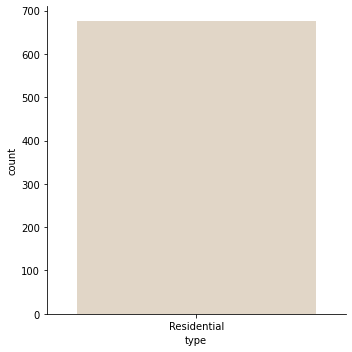

In [ ]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = Meerut_df)

## Merging Datasets

In [ ]:
dfs = [Meerut_df, Gzb_df, Bulandshahr_df, Noida_df]

# final_df = reduce(lambda  left,right: pd.merge(left,right,on=['column_name'],
#                                             how='outer'), dfs)

Final_df = pd.concat([Meerut_df, Gzb_df, Bulandshahr_df, Noida_df], axis=1)

In [ ]:
Final_df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,state,...,date,state,location,type,so2,no2,rspm,spm,pm2_5,date
369907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Uttar Pradesh,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
369923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Uttar Pradesh,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
369945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Uttar Pradesh,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
369983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Uttar Pradesh,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
370000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Uttar Pradesh,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
